In [4]:

import pandas as pd
import numpy as np

In [5]:
# Cargar dataset
df = pd.read_csv("movies_2026.csv", encoding="latin1")

df.head()

,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,...,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount,releaseYear
0,1627085,0.0,Drama|Crime,NaN,NaN,NaN,NaN,0.0,95,False,...,2026-02-01,0.0,0,2,0,0,8,2.0,5.0,2026.0
1,1626914,0.0,Animation,NaN,NaN,NaN,NaN,0.0,3,False,...,2026-02-01,0.0,0,1,0,0,4,0.0,0.0,2026.0
2,1626898,0.0,Animation,NaN,NaN,NaN,NaN,0.0,2,False,...,2026-02-01,0.0,0,1,0,0,3,0.0,0.0,2026.0
3,1626808,0.0,Thriller|Mystery|Documentary,NaN,NaN,NaN,NaN,0.0,5,False,...,2026-02-01,0.0,0,3,0,0,7,0.0,0.0,2026.0
4,1626678,0.0,Animation,NaN,NaN,NaN,NaN,0.0,12,False,...,2026-02-01,0.0,0,1,0,0,3,0.0,0.0,2026.0


In [6]:
# Información general
df.info()

# Estadísticas descriptivas
df.describe()

# Valores nulos
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19883 entries, 0 to 19882
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         19883 non-null  int64  
 1   budget                     19883 non-null  float64
 2   genres                     17918 non-null  object 
 3   homePage                   5607 non-null   object 
 4   productionCompany          14223 non-null  object 
 5   productionCompanyCountry   11473 non-null  object 
 6   productionCountry          16009 non-null  object 
 7   revenue                    19883 non-null  float64
 8   runtime                    19883 non-null  int64  
 9   video                      19397 non-null  object 
 10  director                   18907 non-null  object 
 11  actors                     17282 non-null  object 
 12  actorsPopularity           17275 non-null  object 
 13  actorsCharacter            17048 non-null  obj

id                               0
budget                           0
genres                        1965
homePage                     14276
productionCompany             5660
productionCompanyCountry      8410
productionCountry             3874
revenue                          0
runtime                          0
video                          486
director                       976
actors                        2601
actorsPopularity              2608
actorsCharacter               2835
originalTitle                    1
title                            1
originalLanguage                 0
popularity                       0
releaseDate                      2
voteAvg                          0
voteCount                        0
genresAmount                     0
productionCoAmount               0
productionCountriesAmount        0
actorsAmount                     0
castWomenAmount                 37
castMenAmount                  162
releaseYear                      2
dtype: int64

In [7]:
# Eliminar identificadores o texto irrelevante (si existen)
df = df.drop(columns=['id', 'title', 'imdb_id'], errors='ignore')

df.head()

,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,director,...,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount,releaseYear
0,0.0,Drama|Crime,NaN,NaN,NaN,NaN,0.0,95,False,Javad Hakami,...,2026-02-01,0.0,0,2,0,0,8,2.0,5.0,2026.0
1,0.0,Animation,NaN,NaN,NaN,NaN,0.0,3,False,Kimmy Gatewood,...,2026-02-01,0.0,0,1,0,0,4,0.0,0.0,2026.0
2,0.0,Animation,NaN,NaN,NaN,NaN,0.0,2,False,Kimmy Gatewood,...,2026-02-01,0.0,0,1,0,0,3,0.0,0.0,2026.0
3,0.0,Thriller|Mystery|Documentary,NaN,NaN,NaN,NaN,0.0,5,False,Felipe RoldÃ¡n,...,2026-02-01,0.0,0,3,0,0,7,0.0,0.0,2026.0
4,0.0,Animation,NaN,NaN,NaN,NaN,0.0,12,False,Kimmy Gatewood,...,2026-02-01,0.0,0,1,0,0,3,0.0,0.0,2026.0


In [8]:
#trasformar la date
if 'release_date' in df.columns:
    df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
    df['year'] = df['release_date'].dt.year
    df = df.drop(columns=['release_date'])

In [9]:
# Seleccionar variables numéricas
df_numeric = df.select_dtypes(include=['int64', 'float64'])

df_numeric.head()

,budget,revenue,runtime,popularity,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount,releaseYear
0,0.0,0.0,95,0.0357,0.0,0,2,0,0,8,2.0,5.0,2026.0
1,0.0,0.0,3,0.0357,0.0,0,1,0,0,4,0.0,0.0,2026.0
2,0.0,0.0,2,0.0214,0.0,0,1,0,0,3,0.0,0.0,2026.0
3,0.0,0.0,5,0.0429,0.0,0,3,0,0,7,0.0,0.0,2026.0
4,0.0,0.0,12,0.0379,0.0,0,1,0,0,3,0.0,0.0,2026.0


In [10]:
# Eliminar filas con valores nulos
df_numeric = df_numeric.dropna()

df_numeric.isnull().sum()

budget                       0
revenue                      0
runtime                      0
popularity                   0
voteAvg                      0
voteCount                    0
genresAmount                 0
productionCoAmount           0
productionCountriesAmount    0
actorsAmount                 0
castWomenAmount              0
castMenAmount                0
releaseYear                  0
dtype: int64

In [11]:
features = ['budget', 'revenue', 'runtime', 
            'vote_average', 'vote_count', 
            'popularity', 'year']

# Filtrar solo las columnas que realmente existan
features = [col for col in features if col in df_numeric.columns]

X = df_numeric[features]

X.head()

,budget,revenue,runtime,popularity
0,0.0,0.0,95,0.0357
1,0.0,0.0,3,0.0357
2,0.0,0.0,2,0.0214
3,0.0,0.0,5,0.0429
4,0.0,0.0,12,0.0379


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df = df.loc[X.index].copy()

X_scaled[:5]

array([[-0.34068302, -0.26042336,  0.57577695, -0.16666275],
       [-0.34068302, -0.26042336, -1.26058158, -0.16666275],
       [-0.34068302, -0.26042336, -1.280542  , -0.16675403],
       [-0.34068302, -0.26042336, -1.22066074, -0.16661679],
       [-0.34068302, -0.26042336, -1.08093781, -0.16664871]])

In [13]:
# ---------------------------------------------------
# Función para calcular el estadístico de Hopkins
# ---------------------------------------------------

import numpy as np
from sklearn.neighbors import NearestNeighbors
import random

def hopkins(X, sample_size=None):
    
    if sample_size is None:
        sample_size = int(0.1 * len(X))  # 10% de la muestra
    
    X = np.array(X)
    n, d = X.shape
    
    # Selección aleatoria de puntos reales
    random_indices = random.sample(range(n), sample_size)
    X_sample = X[random_indices]
    
    # Generar puntos aleatorios en el mismo rango
    X_min = np.min(X, axis=0)
    X_max = np.max(X, axis=0)
    
    U = np.random.uniform(X_min, X_max, (sample_size, d))
    
    # Modelo de vecinos más cercanos
    nbrs = NearestNeighbors(n_neighbors=2).fit(X)
    
    # Distancias para puntos reales
    w_distances, _ = nbrs.kneighbors(X_sample)
    w = np.sum(w_distances[:, 1])
    
    # Distancias para puntos aleatorios
    u_distances, _ = nbrs.kneighbors(U)
    u = np.sum(u_distances[:, 0])
    
    H = u / (u + w)
    
    return H


In [14]:
H = hopkins(X_scaled)
print("Estadístico de Hopkins:", round(H, 4))

Estadístico de Hopkins: 0.9958


In [15]:
# ---------------------------------------------------
# VAT (Visual Assessment of cluster Tendency)
# ---------------------------------------------------

import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

def VAT(X):
    
    # Matriz de distancias
    D = squareform(pdist(X))
    
    N = D.shape[0]
    J = list(range(N))
    
    # Inicialización
    I = [np.argmax(np.sum(D, axis=0))]
    J.remove(I[0])
    
    for _ in range(N - 1):
        j = max(J, key=lambda j: min(D[j, i] for i in I))
        I.append(j)
        J.remove(j)
    
    D_reordered = D[np.ix_(I, I)]
    
    return D_reordered

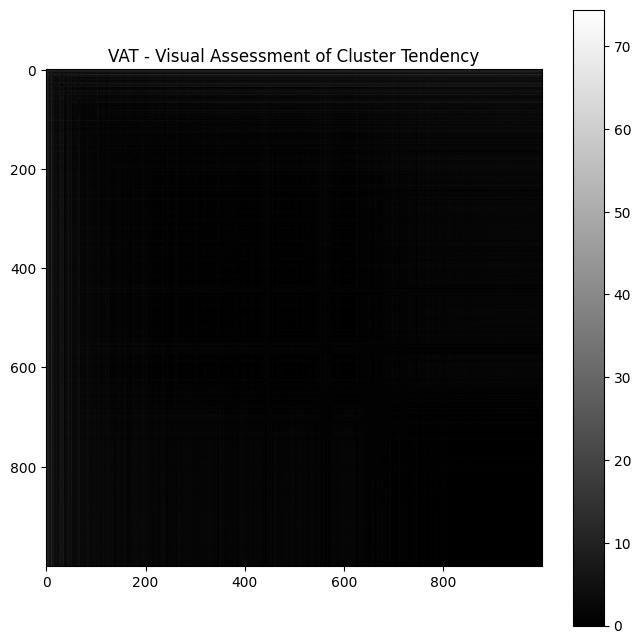

In [16]:
# Si el dataset es grande, usar muestra
max_samples = 1000

if X_scaled.shape[0] > max_samples:
    idx = np.random.choice(X_scaled.shape[0], max_samples, replace=False)
    X_vat = X_scaled[idx]
else:
    X_vat = X_scaled

D_vat = VAT(X_vat)

plt.figure(figsize=(8, 8))
plt.imshow(D_vat, cmap='gray')
plt.title("VAT - Visual Assessment of Cluster Tendency")
plt.colorbar()
plt.show()

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

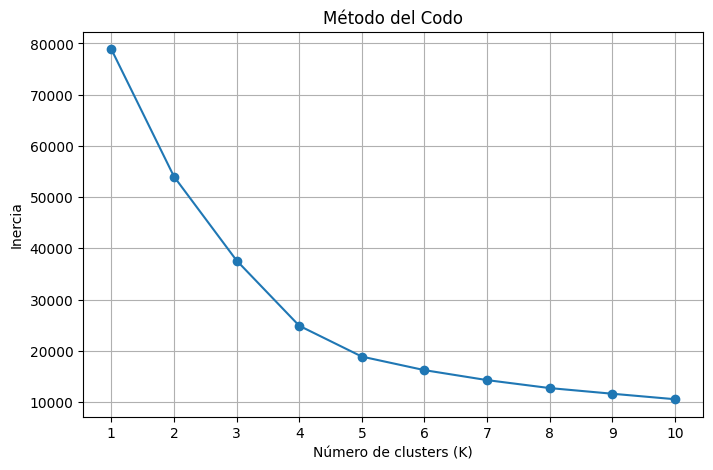

In [18]:
plt.figure(figsize=(8,5))
plt.plot(K_range, inertias, marker='o')
plt.xlabel("Número de clusters (K)")
plt.ylabel("Inercia")
plt.title("Método del Codo")
plt.xticks(K_range)
plt.grid(True)
plt.show()

In [19]:
# =====================================
# 1.4 - KMEANS
# =====================================

from sklearn.cluster import KMeans

k = 4

kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Agregar clusters al dataframe
df["cluster_kmeans"] = kmeans_labels

print("K-Means aplicado correctamente.")
print("Cantidad de elementos por cluster:")
print(df["cluster_kmeans"].value_counts())

K-Means aplicado correctamente.
Cantidad de elementos por cluster:
cluster_kmeans
1    11192
0     7839
2      680
3        8
Name: count, dtype: int64


In [21]:
# =====================================
# 1.4 - CLUSTERING JERÁRQUICO
# =====================================

from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=k, linkage='ward')
hier_labels = hierarchical.fit_predict(X_scaled)

# Agregar clusters al dataframe
df["cluster_hier"] = hier_labels

print("Clustering jerárquico aplicado correctamente.")
print("Cantidad de elementos por cluster:")
print(df["cluster_hier"].value_counts())

Clustering jerárquico aplicado correctamente.
Cantidad de elementos por cluster:
cluster_hier
0    12027
2     7296
3      383
1       13
Name: count, dtype: int64


In [22]:
# =====================================
# 1.5 - EVALUACIÓN CON SILHOUETTE
# =====================================

from sklearn.metrics import silhouette_score

sil_kmeans = silhouette_score(X_scaled, df["cluster_kmeans"])
sil_hier = silhouette_score(X_scaled, df["cluster_hier"])

print(f"Silhouette K-Means: {sil_kmeans:.4f}")
print(f"Silhouette Jerárquico: {sil_hier:.4f}")

Silhouette K-Means: 0.6179
Silhouette Jerárquico: 0.5846
